In [44]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import os
import seaborn as sns
import metrics
import matplotlib.pyplot as plt
from pathlib import Path

In [45]:
plt.rcParams['text.usetex'] = True

In [46]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [47]:
# seleziono i dataset windowed
directory = 'windowed_data_se'
totdi_no_ric = {}
totdi_no_ord = {}
noric = {}
noass = {}
noord = {}
cods = [1,9]
for file in os.listdir(directory):
    ffile = os.path.join(directory,file)
    df = pd.read_csv(ffile, index_col = 0)
    year = int( file.replace(".csv","") )
    # seleziono i settori 1 e 9

    #df_cod = df.loc[df['Cod_AreaCUN'].isin(cods)]

    df_cod = df
    noric[year] = len ( df_cod.loc[df_cod['fascia_id'] == 0] )
    noass[year] = len ( df_cod.loc[df_cod['fascia_id'] == 1] )
    noord[year] = len ( df_cod.loc[df_cod['fascia_id'] == 2] )

    
    # elimino righe relative ai professori ordinari e calcolo il DI
    df_no_ord= df_cod[df_cod['fascia_id'] != 2]
    try:
        di_no_ord = metrics.disparate_impact(df_no_ord, {'sex':0}, 'fascia_id', 1)
    except ZeroDivisionError:
        di_no_ord = 0    

    totdi_no_ord[year] = di_no_ord  
    
    # elimino righe relative ai ricercatori e calcolo il DI
    df_no_ric= df_cod[df_cod['fascia_id'] != 0]
    try:
        di_no_ric = metrics.disparate_impact(df_no_ric, {'sex':0}, 'fascia_id', 2)
    except ZeroDivisionError:
        di_no_ric = 0  

    totdi_no_ric[year] = di_no_ric 

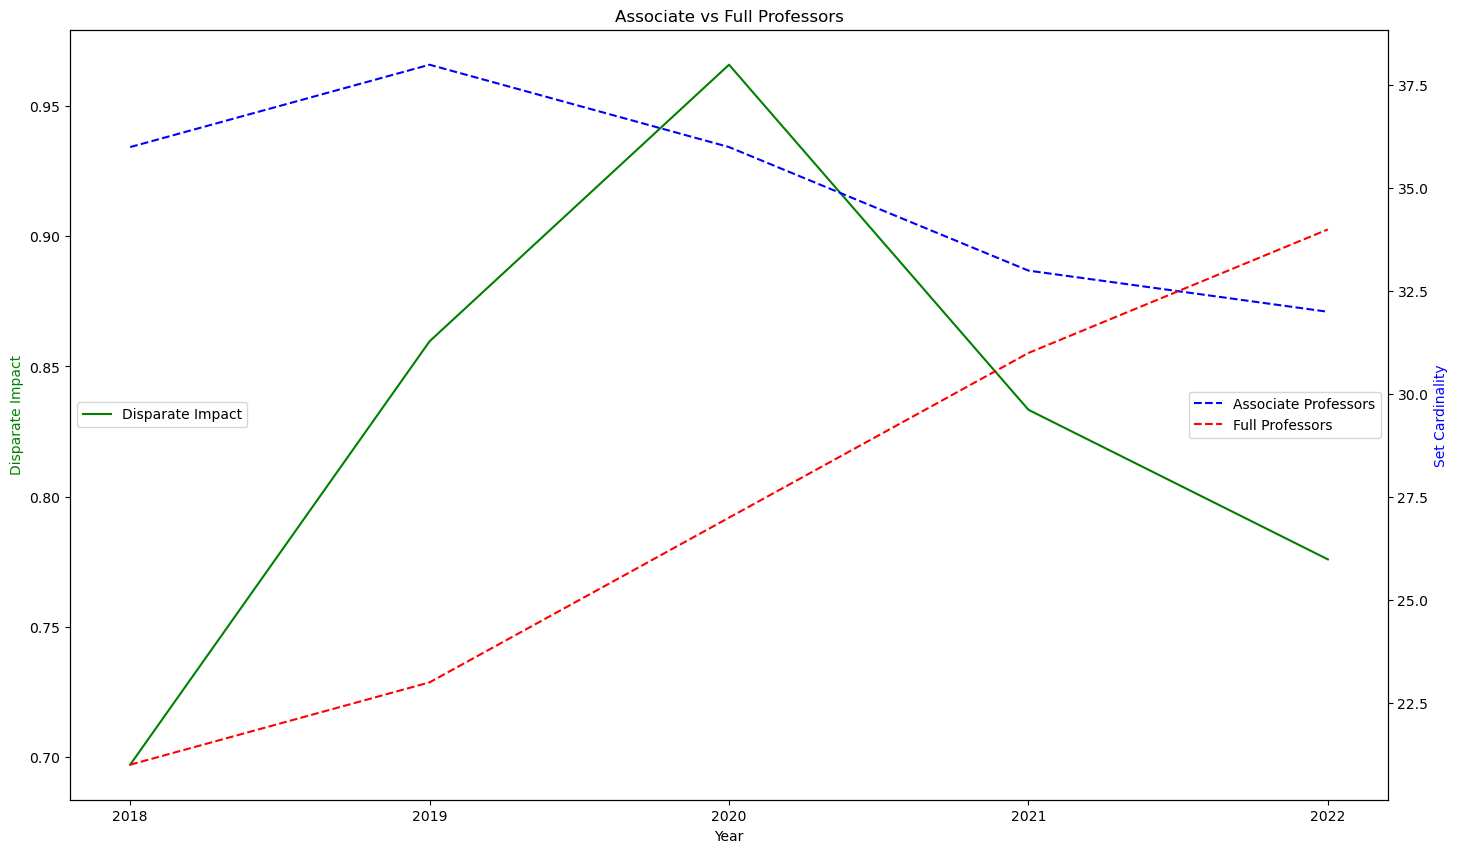

In [48]:
# Diagramma DI considerando Associati e Ordinari
toplot = totdi_no_ric
toplot = dict(sorted(toplot.items()))
noass = dict(sorted(noass.items()))
noord = dict(sorted(noord.items()))

# Diagramma DI considerando Associati e Ordinari

fig, ax1 = plt.subplots(figsize=(17, 10))
#fig.tight_layout()

ax1.set_xticks(list(toplot.keys()))

ax2 = ax1.twinx()
ax2.set_axisbelow(True)

ax1.plot(list(toplot.keys()),list(toplot.values()), 'g-', label='Disparate Impact',)
ax2.plot(list(noass.keys()),list(noass.values()), color='blue', linestyle='dashed', label='Associate Professors')
ax2.plot(list(noord.keys()),list(noord.values()),color='red', linestyle='dashed', label='Full Professors')

ax1.set_xlabel('Year')
ax1.set_ylabel('Disparate Impact', color='g')
ax2.set_ylabel('Set Cardinality', color='b')

ax1.legend(loc = 'center left')
ax2.legend(loc = 'right')

ax1.set_title("Associate vs Full Professors")
plt.show()

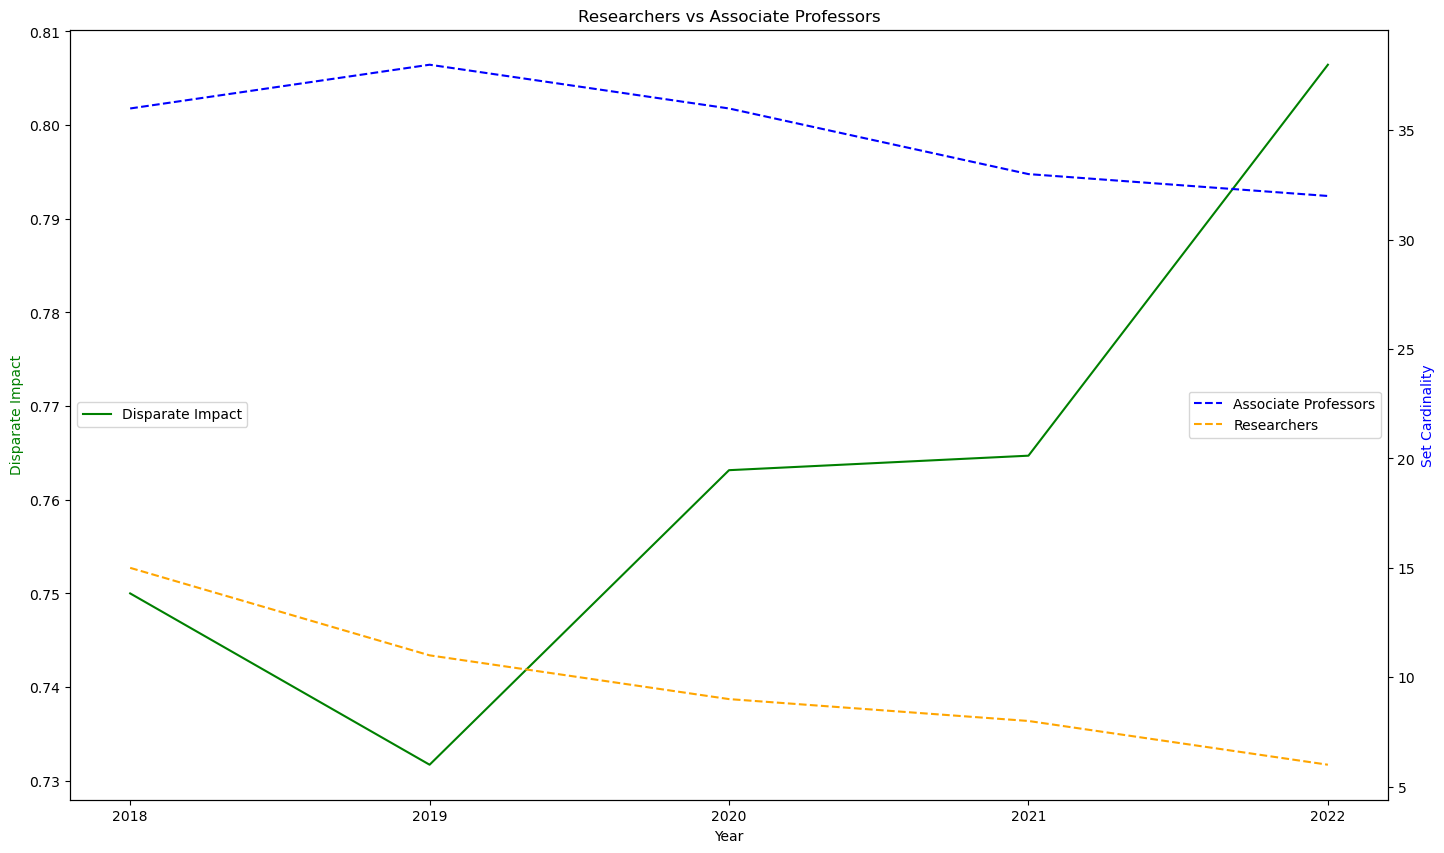

In [49]:
# Diagramma DI considerando Ricercatori e Associati

toplot = totdi_no_ord
toplot = dict(sorted(toplot.items()))
noass = dict(sorted(noass.items()))
noric = dict(sorted(noric.items()))

fig, ax1 = plt.subplots(figsize=(17, 10))
#fig.tight_layout()

ax1.set_xticks(list(toplot.keys()))

ax2 = ax1.twinx()
ax2.set_axisbelow(True)

ax1.plot(list(toplot.keys()),list(toplot.values()), 'g-', label='Disparate Impact',)
ax2.plot(list(noass.keys()),list(noass.values()), color='blue', linestyle='dashed', label='Associate Professors')
ax2.plot(list(noric.keys()),list(noric.values()),color='orange', linestyle='dashed', label='Researchers')

ax1.set_xlabel('Year')
ax1.set_ylabel('Disparate Impact', color='g')
ax2.set_ylabel('Set Cardinality', color='b')

ax1.legend(loc = 'center left')
ax2.legend(loc = 'right')

ax1.set_title("Researchers vs Associate Professors")
plt.show()

In [50]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

/var/folders/1f/dn5t35316d5b0gv0v6mcj6sm0000gn/T/ipykernel_3312/468143471.py:222: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('grid.pdf', type='pdf', bbox_inches='tight')
/var/folders/1f/dn5t35316d5b0gv0v6mcj6sm0000gn/T/ipykernel_3312/468143471.py:223: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('grid.png', type='png', bbox_inches='tight')


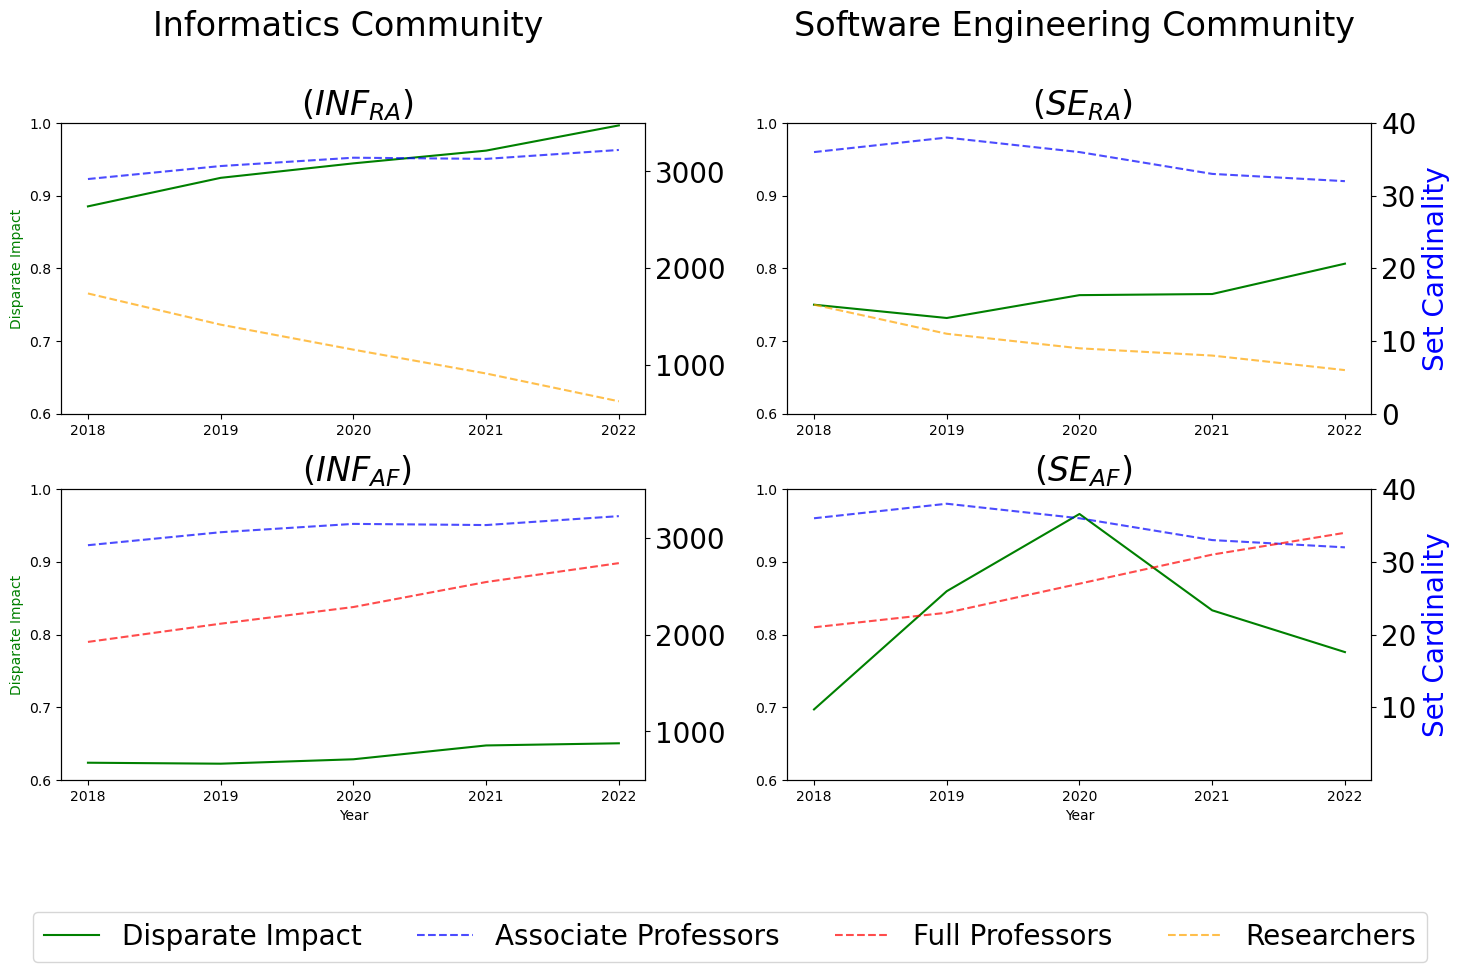

In [51]:
import matplotlib
fig, ( (ax_one,ax_two),(ax_three,ax_four)) = plt.subplots(nrows=2,ncols=2)
axes= [ax_one,ax_two,ax_three,ax_four]


font = {
        'size'   : 20}

matplotlib.rc('font', **font)


fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(15,10)

# seleziono i dataset windowed
directory = 'windowed_data'
totdi_no_ric = {}
totdi_no_ord = {}
noric = {}
noass = {}
noord = {}
cods = [1,9]
for file in os.listdir(directory):
    ffile = os.path.join(directory,file)
    df = pd.read_csv(ffile, index_col = 0)
    year = int( file.replace(".csv","") )
    # seleziono i settori 1 e 9

    #df_cod = df.loc[df['Cod_AreaCUN'].isin(cods)]

    df_cod = df
    noric[year] = len ( df_cod.loc[df_cod['fascia_id'] == 0] )
    noass[year] = len ( df_cod.loc[df_cod['fascia_id'] == 1] )
    noord[year] = len ( df_cod.loc[df_cod['fascia_id'] == 2] )

    
    # elimino righe relative ai professori ordinari e calcolo il DI
    df_no_ord= df_cod[df_cod['fascia_id'] != 2]
    try:
        di_no_ord = metrics.disparate_impact(df_no_ord, {'sex':0}, 'fascia_id', 1)
    except ZeroDivisionError:
        di_no_ord = 0    

    totdi_no_ord[year] = di_no_ord  
    
    # elimino righe relative ai ricercatori e calcolo il DI
    df_no_ric= df_cod[df_cod['fascia_id'] != 0]
    try:
        di_no_ric = metrics.disparate_impact(df_no_ric, {'sex':0}, 'fascia_id', 2)
    except ZeroDivisionError:
        di_no_ric = 0  

    totdi_no_ric[year] = di_no_ric 



# Diagramma DI considerando Ricercatori e Associati

toplot = totdi_no_ord
toplot = dict(sorted(toplot.items()))
noass = dict(sorted(noass.items()))
noric = dict(sorted(noric.items()))

ax_one.set_xticks(list(toplot.keys()))
ax_one.set_ylim(0.6,1)
ax_two.set_ylim(0.6,1)
ax_three.set_ylim(0.6,1)
ax_four.set_ylim(0.6,1)


ax2 = ax_one.twinx()
ax2.set_axisbelow(True)
ax2.set_ylim(500,3500)

ax_one.plot(list(toplot.keys()),list(toplot.values()), 'g-', label='Disparate Impact',)
ax2.plot(list(noass.keys()),list(noass.values()), color='blue', linestyle='dashed', alpha=0.7, label='Associate Professors')
ax2.plot(list(noric.keys()),list(noric.values()),color='orange', linestyle='dashed', alpha=0.7, label='Researchers')

#ax_one.set_xlabel('Year')
ax_one.set_ylabel('Disparate Impact', color='g')
#ax2.set_ylabel('Set Cardinality', color='b')
ax_one.set_title("Informatics Community \n \n" + r" $(INF_{RA})$ ")

# Diagramma DI considerando Associati e Ordinari
toplot = totdi_no_ric
toplot = dict(sorted(toplot.items()))
noass = dict(sorted(noass.items()))
noord = dict(sorted(noord.items()))

# Diagramma DI considerando Associati e Ordinari

ax_three.set_xticks(list(toplot.keys()))

ax2 = ax_three.twinx()
ax2.set_axisbelow(True)
ax2.set_ylim(500,3500)

ax_three.plot(list(toplot.keys()),list(toplot.values()), 'g-', label='Disparate Impact',)
ax2.plot(list(noass.keys()),list(noass.values()), color='blue', linestyle='dashed', alpha=0.7, label='Associate Professors')
ax2.plot(list(noord.keys()),list(noord.values()),color='red', linestyle='dashed', alpha=0.7, label='Full Professors')

ax_three.set_xlabel('Year')
ax_three.set_ylabel('Disparate Impact', color='g')
#ax2.set_ylabel('Set Cardinality', color='b')


ax_three.set_title("" + r" $(INF_{AF})$ ")


#----------------------------------------------------------------------------------------------------------------------
# seleziono i dataset windowed
directory = 'windowed_data_se'
totdi_no_ric = {}
totdi_no_ord = {}
noric = {}
noass = {}
noord = {}
cods = [1,9]
for file in os.listdir(directory):
    ffile = os.path.join(directory,file)
    df = pd.read_csv(ffile, index_col = 0)
    year = int( file.replace(".csv","") )
    # seleziono i settori 1 e 9

    #df_cod = df.loc[df['Cod_AreaCUN'].isin(cods)]

    df_cod = df
    noric[year] = len ( df_cod.loc[df_cod['fascia_id'] == 0] )
    noass[year] = len ( df_cod.loc[df_cod['fascia_id'] == 1] )
    noord[year] = len ( df_cod.loc[df_cod['fascia_id'] == 2] )

    
    # elimino righe relative ai professori ordinari e calcolo il DI
    df_no_ord= df_cod[df_cod['fascia_id'] != 2]
    try:
        di_no_ord = metrics.disparate_impact(df_no_ord, {'sex':0}, 'fascia_id', 1)
    except ZeroDivisionError:
        di_no_ord = 0    

    totdi_no_ord[year] = di_no_ord  
    
    # elimino righe relative ai ricercatori e calcolo il DI
    df_no_ric= df_cod[df_cod['fascia_id'] != 0]
    try:
        di_no_ric = metrics.disparate_impact(df_no_ric, {'sex':0}, 'fascia_id', 2)
    except ZeroDivisionError:
        di_no_ric = 0  

    totdi_no_ric[year] = di_no_ric 


# Diagramma DI considerando Ricercatori e Associati

toplot = totdi_no_ord
toplot = dict(sorted(toplot.items()))
noass = dict(sorted(noass.items()))
noric = dict(sorted(noric.items()))

ax_two.set_xticks(list(toplot.keys()))

ax2 = ax_two.twinx()
ax2.set_axisbelow(True)
ax2.set_ylim(0,40)

ax_two.plot(list(toplot.keys()),list(toplot.values()), 'g-', label='Disparate Impact')
#limit ax to 0.6-1
ax_two.set_ylim(0.6,1)

ax2.plot(list(noric.keys()),list(noric.values()), color='orange', linestyle='dashed', alpha = 0.7, label='Researchers')

handles3, labels3 = ax2.get_legend_handles_labels()

ax2.plot(list(noass.keys()),list(noass.values()), color='blue', linestyle='dashed', alpha = 0.7, label='Associate Professors')

#ax_two.set_xlabel('Year')
#ax_two.set_ylabel('Disparate Impact', color='g')
ax2.set_ylabel('Set Cardinality', color='b')
ax_two.set_title("Software Engineering Community \n \n" + r" $(SE_{RA})$ ")


# Diagramma DI considerando Associati e Ordinari
toplot = totdi_no_ric
toplot = dict(sorted(toplot.items()))
noass = dict(sorted(noass.items()))
noord = dict(sorted(noord.items()))

# Diagramma DI considerando Associati e Ordinari


ax_four.set_xticks(list(toplot.keys()))


ax2 = ax_four.twinx()
ax2.set_axisbelow(True)
ax2.set_ylim(0,40)

from matplotlib.ticker import MaxNLocator
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax_four.plot(list(toplot.keys()),list(toplot.values()), 'g-', label='Disparate Impact',)
ax2.plot(list(noass.keys()),list(noass.values()), color='blue', linestyle='dashed', alpha = 0.7, label='Associate Professors')
ax2.plot(list(noord.keys()),list(noord.values()),color='red', linestyle='dashed', alpha = 0.7, label='Full Professors')

ax_four.set_xlabel('Year')
#ax_four.set_ylabel('Disparate Impact', color='g')
ax2.set_ylabel('Set Cardinality', color='b')
ax2.set_yticks([10,20,30,40])

ax_four.set_title("" + r" $(SE_{AF})$ ")


handles, labels = ax_four.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles + handles2 + handles3
labels = labels + labels2 + labels3


fig.tight_layout()
plt.subplots_adjust(bottom=0.2)
fig.legend(handles, labels, loc='lower center',ncol=4)
fig.savefig('grid.pdf', type='pdf', bbox_inches='tight')
fig.savefig('grid.png', type='png', bbox_inches='tight')
plt.show()

In [52]:
df.Genere.value_counts()

M    60
F    12
Name: Genere, dtype: int64

In [53]:
folder = 'windowed_data'
tot = pd.DataFrame()
file = '2018.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)
df

,anni_servizio,papers_-3,papers_-2,papers_-1,papers_0,citations_-3,citations_-2,citations_-1,citations_0,fascia_id,...,ING-INF/07,MAT/01,MAT/02,MAT/03,MAT/04,MAT/05,MAT/06,MAT/07,MAT/08,MAT/09
9553,11,1,5,4,6,8,77,23,80,0,...,0,0,0,0,0,0,0,0,0,0
9554,11,3,3,1,2,66,7,1,50,1,...,0,0,0,0,0,0,0,0,0,0
9555,11,4,18,9,9,37,367,150,113,1,...,0,0,0,0,0,0,0,0,0,0
9556,11,0,3,4,0,0,35,10,0,0,...,0,0,0,0,0,0,0,0,0,0
9557,11,14,13,20,12,983,498,427,157,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,11,3,2,3,3,28,29,30,30,0,...,0,0,0,0,0,0,0,0,0,0
39919,11,0,0,3,0,0,0,13,0,1,...,0,0,0,0,0,0,0,0,0,0
39920,11,7,4,9,6,68,30,56,54,1,...,0,0,0,0,0,0,0,0,0,0
39921,11,1,2,4,5,6,7,31,32,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)
pie

,sex
Men,5095
Women,1492


,sex
Men,5095
Women,1492


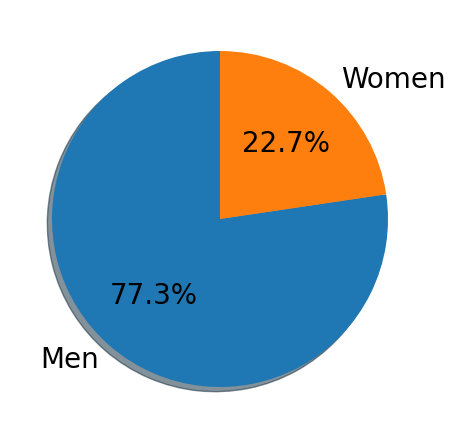

In [55]:
folder = 'windowed_data'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)
display(pie)
labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_all_percentages.pdf"))
plt.show()

,sex
Men,60
Women,12


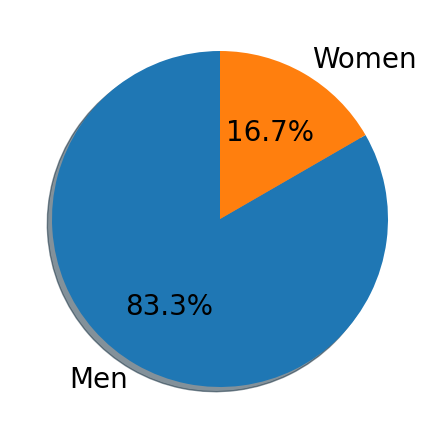

In [56]:
folder = 'windowed_data_se'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)

display(pie)

labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_SE_percentages.pdf"))
plt.show()

,sex
Men,452
Women,176


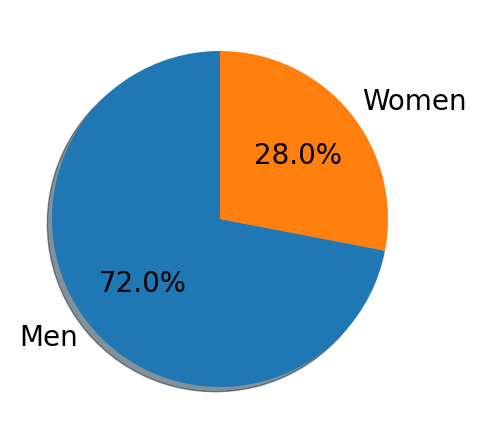

In [57]:
folder = 'windowed_data'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

df = df.loc[df.fascia_id == 0]


pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)

display(pie)

labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_all_percentages_researchers.pdf"))
plt.show()



,sex
Men,2332
Women,890


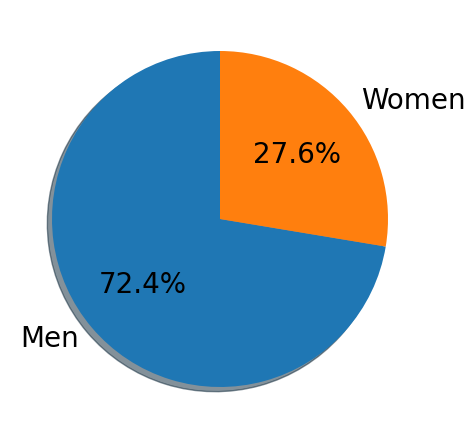

In [58]:
folder = 'windowed_data'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

df = df.loc[df.fascia_id == 1]


pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)

display(pie)

labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_all_percentages_associate.pdf"))
plt.show()

,sex
Men,2311
Women,426


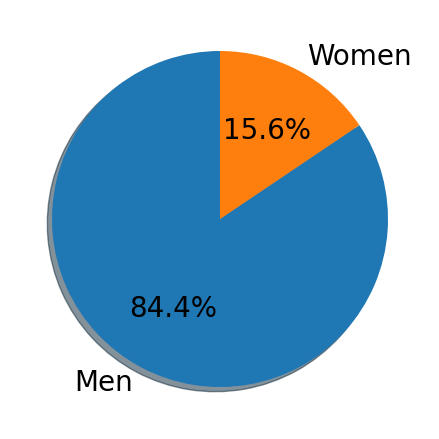

In [59]:
folder = 'windowed_data'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

df = df.loc[df.fascia_id == 2]


pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)

display(pie)

labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_all_percentages_full.pdf"))
plt.show()

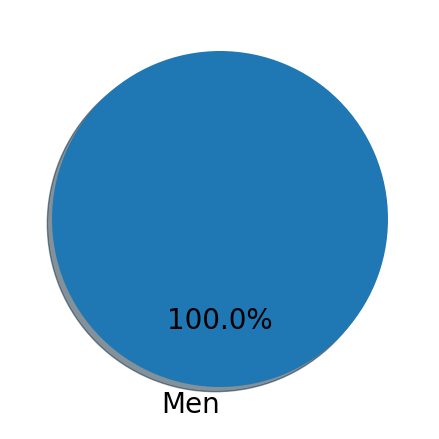

In [60]:
folder = 'windowed_data_se'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

df = df.loc[df.fascia_id == 0]

pie = df.sex.value_counts()
pie.index = ['Men']
pie = pd.DataFrame(pie)


labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_SE_percentages_researchers.pdf"))
plt.show()

,sex
Men,25
Women,7


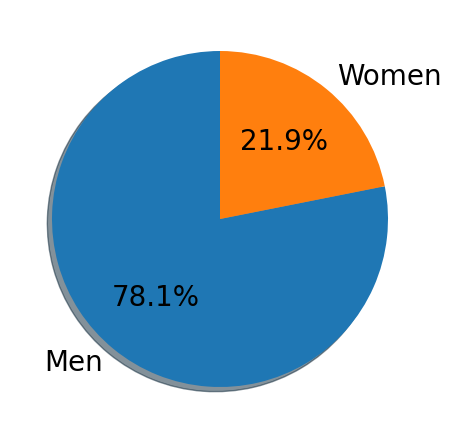

In [61]:
folder = 'windowed_data_se'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

df = df.loc[df.fascia_id == 1]


pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)

display(pie)

labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_SE_percentages_associate.pdf"))
plt.show()

,sex
Men,29
Women,5


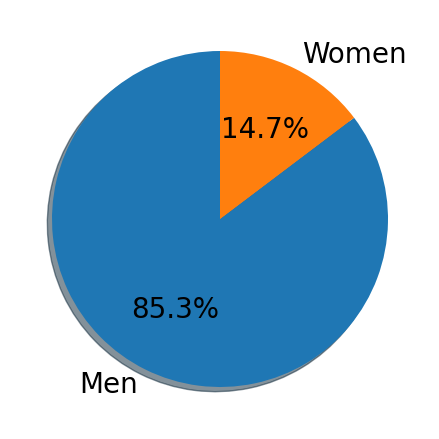

In [62]:
folder = 'windowed_data_se'
tot = pd.DataFrame()
file = '2022.csv'
ffile = os.path.join(folder,file)
df = pd.read_csv(ffile, index_col = 0)

df = df.loc[df.fascia_id == 2]


pie = df.sex.value_counts()
pie.index = ['Men','Women']
pie = pd.DataFrame(pie)

display(pie)

labels = pie.index
sizes = pie.sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
#plt.title("Set percentages in Software Engineering in Italy")
fig.tight_layout()
fig.savefig(os.path.join("gender_SE_percentages_full.pdf"))
plt.show()